# Multi-label classification on Amazon Satellite Dataset
---

# Import Libraries

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

In [3]:
import torch
torch.cuda.is_available()

True

# Load Dataset

In [4]:
! mkdir ../data/planet/
! wget --header 'Host: storage.googleapis.com' --user-agent 'Mozilla/5.0 (X11; Linux x86_64; rv:57.0) Gecko/20100101 Firefox/57.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://www.kaggle.com/' --header 'Upgrade-Insecure-Requests: 1' 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/6322/train-jpg.tar.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528096488&Signature=dAW1L9bmBRhXEkBgE%2F%2B4BttwgTvMYpslkJ7Cw9loT67hOc96tV1i2YiJQ4ag44kOytNbafw4OAabXl%2BiqzgpnbhO3q39WO6X0JyHncScqBfLyH4bbbfH1U03XLIjtAJKWdL%2FJzwQ5msINAn%2BI4Z%2BVBFMrgdd9%2BcYzN%2BPOxoz1Zbrosyv%2BHKyEOKbkwgsJ%2BWVglM9F1MGdV3rWvnYZ4UZ%2BluEr0GoBvIcZyOHngXVyRzrgPG%2B1kzdbm4ahjp19LmC1dlu%2FKWN%2BFRocIp5MAdZDtUYsSoEsZOAm0mLgcF5RIqgJQsNkYhAQRjgD7V%2BnNbZ0zzhWoCPqGsswJFHTyDVhA%3D%3D' --output-document '../data/planet/train-jpg.tar.7z'

--2018-06-01 07:20:00--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/6322/train-jpg.tar.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528096488&Signature=dAW1L9bmBRhXEkBgE%2F%2B4BttwgTvMYpslkJ7Cw9loT67hOc96tV1i2YiJQ4ag44kOytNbafw4OAabXl%2BiqzgpnbhO3q39WO6X0JyHncScqBfLyH4bbbfH1U03XLIjtAJKWdL%2FJzwQ5msINAn%2BI4Z%2BVBFMrgdd9%2BcYzN%2BPOxoz1Zbrosyv%2BHKyEOKbkwgsJ%2BWVglM9F1MGdV3rWvnYZ4UZ%2BluEr0GoBvIcZyOHngXVyRzrgPG%2B1kzdbm4ahjp19LmC1dlu%2FKWN%2BFRocIp5MAdZDtUYsSoEsZOAm0mLgcF5RIqgJQsNkYhAQRjgD7V%2BnNbZ0zzhWoCPqGsswJFHTyDVhA%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629296207 (600M) [application/x-7z-compressed]
Saving to: ‘../data/planet/train-jpg.tar.7z’

../data/planet/trai 100%[===================>] 600.14M   116MB/s    in 5.2

In [23]:
! 7z x ../data/planet/train-jpg.tar.7z
! mv train-jpg.tar ../data/planet/


7-Zip [64] 9.20  Copyright (c) 1999-2010 Igor Pavlov  2010-11-18
p7zip Version 9.20 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,4 CPUs)

Processing archive: ../data/planet/train-jpg.tar.7z

Extracting  train-jpg.tar

Everything is Ok

Size:       665753600
Compressed: 629296207


In [30]:
! tar -xf ../data/planet/train-jpg.tar -C ../data/planet/

In [34]:
! wget --header 'Host: storage.googleapis.com' --user-agent 'Mozilla/5.0 (X11; Linux x86_64; rv:57.0) Gecko/20100101 Firefox/57.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://www.kaggle.com/' --header 'Upgrade-Insecure-Requests: 1' 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/6322/test-jpg.tar.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528097802&Signature=KGVFJQN3WfglIFFp%2FyN5CSrhcZ5GvI9WqKph4ojPxRe5XBwAYp3CEtqGaYEyKkWeQcP%2BEFtsVNFr7wAC%2BPmmEX7Bk1zkyuL8A7GHHusYXEt7Q1pfPee%2B4Wxl4qwsTUbR3Al6Qb38P6oZWFW87F72eF%2FcPQuUUD6pzDJPXqG6v9Heb990jocMklp3p10XbiXsibTtKlyFWKLplVHlqOjeTMH8R%2BEEycE6RaiJQP3sS3GD4Z2eGh1tYxjkCWdaqaME2KZmUThfONZy8E2i96GzzADy4GbwqWUjSrT3s4C%2Bb013o82xbw8ii2LUnIZmECHOMk%2BWU4lhFgLNq5WHA9JuKg%3D%3D' --output-document '../data/planet/test-jpg.tar.7z'

--2018-06-01 07:37:13--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/6322/test-jpg.tar.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528097802&Signature=KGVFJQN3WfglIFFp%2FyN5CSrhcZ5GvI9WqKph4ojPxRe5XBwAYp3CEtqGaYEyKkWeQcP%2BEFtsVNFr7wAC%2BPmmEX7Bk1zkyuL8A7GHHusYXEt7Q1pfPee%2B4Wxl4qwsTUbR3Al6Qb38P6oZWFW87F72eF%2FcPQuUUD6pzDJPXqG6v9Heb990jocMklp3p10XbiXsibTtKlyFWKLplVHlqOjeTMH8R%2BEEycE6RaiJQP3sS3GD4Z2eGh1tYxjkCWdaqaME2KZmUThfONZy8E2i96GzzADy4GbwqWUjSrT3s4C%2Bb013o82xbw8ii2LUnIZmECHOMk%2BWU4lhFgLNq5WHA9JuKg%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 632362315 (603M) [application/x-7z-compressed]
Saving to: ‘../data/planet/test-jpg.tar.7z’

../data/planet/test 100%[===================>] 603.07M   105MB/s    in 5.7s    

2018-06-0

In [35]:
! 7z x ../data/planet/test-jpg.tar.7z
! mv test-jpg.tar ../data/planet/


7-Zip [64] 9.20  Copyright (c) 1999-2010 Igor Pavlov  2010-11-18
p7zip Version 9.20 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,4 CPUs)

Processing archive: ../data/planet/test-jpg.tar.7z

Extracting  test-jpg.tar

Everything is Ok

Size:       668989440
Compressed: 632362315


In [36]:
! tar -xf ../data/planet/test-jpg.tar -C ../data/planet/

In [52]:
! wget --header 'Host: storage.googleapis.com' --user-agent 'Mozilla/5.0 (X11; Linux x86_64; rv:57.0) Gecko/20100101 Firefox/57.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://www.kaggle.com/' --header 'Upgrade-Insecure-Requests: 1' 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/6322/train_v2.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528098371&Signature=s%2FA43MpCxVCPyLQm3jtYymAB2z9CN2PM5HAoEOiq0tErU3XHh%2BiQ8l22ROQthwA8o4l%2FTtZIe9NmVcyzTGB%2BtDck0Mv6v%2FJBtAcJZCXUeG6oJjoX5sOk9lcbIv1Y8nHC34oF31crVkAapEjqk099hNLLmLhUBZYXZq%2F1PbLOeqHCXSe4dzQ4x8cCZh4zx51a0Os3bxLW226wPadbRjEfLdYlSsAPZa0joxDBh1%2FOwpb6su8Qxn9OCQ9maJLcopQVAb8LALuwrNBFZbMH8b%2FMC4HHt0bdTWUHag3Yre83F5O0sekgCkGrMzdbEH2IG0ZrkpUzGsQLoevParf%2Bg5lysQ%3D%3D' --output-document '../data/planet/train_v2.csv.zip'

--2018-06-01 07:46:38--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/6322/train_v2.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528098371&Signature=s%2FA43MpCxVCPyLQm3jtYymAB2z9CN2PM5HAoEOiq0tErU3XHh%2BiQ8l22ROQthwA8o4l%2FTtZIe9NmVcyzTGB%2BtDck0Mv6v%2FJBtAcJZCXUeG6oJjoX5sOk9lcbIv1Y8nHC34oF31crVkAapEjqk099hNLLmLhUBZYXZq%2F1PbLOeqHCXSe4dzQ4x8cCZh4zx51a0Os3bxLW226wPadbRjEfLdYlSsAPZa0joxDBh1%2FOwpb6su8Qxn9OCQ9maJLcopQVAb8LALuwrNBFZbMH8b%2FMC4HHt0bdTWUHag3Yre83F5O0sekgCkGrMzdbEH2IG0ZrkpUzGsQLoevParf%2Bg5lysQ%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162930 (159K) [application/zip]
Saving to: ‘../data/planet/train_v2.csv.zip’

../data/planet/trai 100%[===================>] 159.11K  --.-KB/s    in 0.001s  

2018-06-01 07:46:39 (1

In [56]:
! unzip -q ../data/planet/train_v2.csv.zip -d ../data/planet/

In [37]:
! rm ../data/planet/test-jpg.tar
! rm ../data/planet/train-jpg.tar

In [4]:
PATH = '../data/planet/'

In [5]:
ls {PATH}

__MACOSX/  test-jpg.tar.7z  train-jpg/        train_v2.csv
test-jpg/  tmp/             train-jpg.tar.7z  train_v2.csv.zip


In [6]:
!ls {PATH}train-jpg/ | wc -l
!ls {PATH}test-jpg/ | wc -l


40479
40669


# Multi-label versus single-label classification

In [7]:
from fastai.plots import *

In [8]:
def get_1st(path): return glob(f'{path}/*.*')[0]

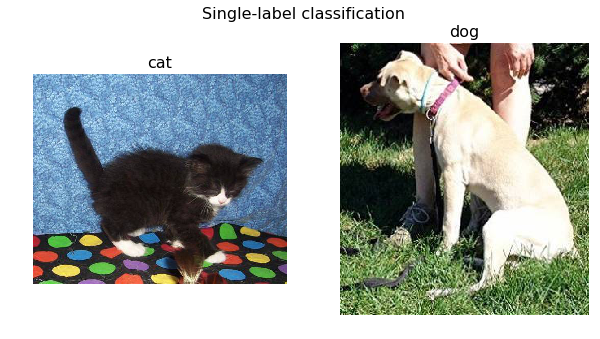

In [9]:
dc_path = "../data/dogscats/dogscats/valid/"
list_paths = [get_1st(f"{dc_path}cats"), get_1st(f"{dc_path}dogs")]
plots_from_files(list_paths, titles=["cat", "dog"], maintitle="Single-label classification")

In single-label classification each sample belongs to one class. In the previous example, each image is either a *dog* or a *cat*.

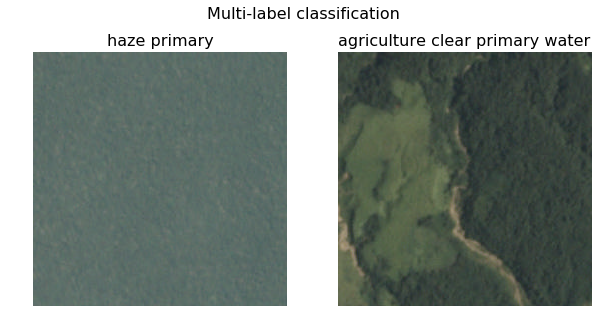

In [10]:
list_paths = [f"{PATH}train-jpg/train_0.jpg", f"{PATH}train-jpg/train_1.jpg"]
titles=["haze primary", "agriculture clear primary water"]
plots_from_files(list_paths, titles=titles, maintitle="Multi-label classification")

In multi-label classification each sample can belong to one or more clases. In the previous example, the first images belongs to two clases: *haze* and *primary*. The second image belongs to four clases: *agriculture*, *clear*, *primary* and  *water*.

# Multi-label models for Planet dataset

In [11]:
from helper.planet import f2

metrics=[f2]
f_model = resnet34

In [12]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

We use a different set of data augmentations for this dataset - we also allow vertical flips, since we don't expect vertical orientation of satellite images to change our classifications.

In [13]:
def gen_data_loader(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

## Data exploration

In [14]:
data = gen_data_loader(256)
data.classes

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

In [15]:
x,y = next(iter(data.val_dl))

In [16]:
x.shape

torch.Size([64, 3, 256, 256])

In [17]:
y.shape

torch.Size([64, 17])

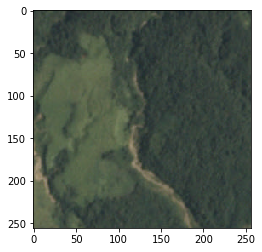

In [18]:
sample = to_np(x[0])
sample_denorm = data.val_ds.denorm(sample)[0]
plt.imshow(sample_denorm)

**Looking at the labels of the above image**

In [19]:
list(zip(data.classes, y[0]))

[('agriculture', 1.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 1.0)]

**Making the image lighter**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


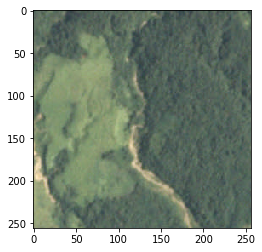

In [20]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.5);

___

# Begin Training with 64 x 64

## Generate Data

In [21]:
sz=64

In [23]:
data = gen_data_loader(sz)

In [24]:
x,y = next(iter(data.trn_dl))
x.shape, y.shape

(torch.Size([64, 3, 64, 64]), torch.Size([64, 17]))

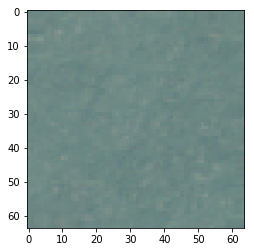

In [25]:
sample = to_np(x[0])
plt.imshow(data.val_ds.denorm(sample)[0]*1.4)

In [26]:
metrics

[<function helper.planet.f2(preds, targs, start=0.17, end=0.24, step=0.01)>]

## Find Optimal Learning Rate

In [27]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

epoch      trn_loss   val_loss   f2         
    0      0.226897   0.303335   0.80396   



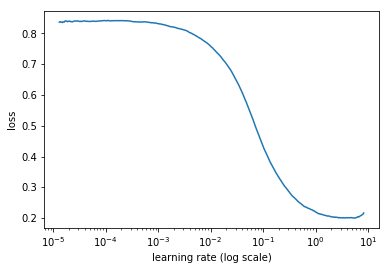

In [28]:
lrf=learn.lr_find()
learn.sched.plot()

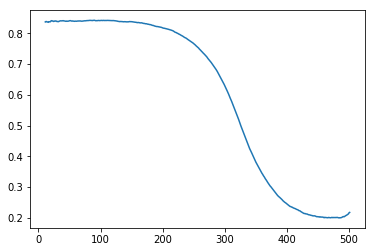

In [29]:
learn.sched.plot_loss()

In [47]:
def plot_loss_change(sched, sma=1, n_skip=20, y_lim=(-0.01,0.01)):
    """
    Plots rate of change of the loss function.
    Parameters:
        sched - learning rate scheduler, an instance of LR_Finder class.
        sma - number of batches for simple moving average to smooth out the curve.
        n_skip - number of batches to skip on the left.
        y_lim - limits for the y axis.
    """
    derivatives = [0] * (sma + 1)
    for i in range(1 + sma, len(learn.sched.lrs)):
        derivative = (learn.sched.losses[i] - learn.sched.losses[i - sma]) / sma
        derivatives.append(derivative)
        
    plt.ylabel("d/loss")
    plt.xlabel("learning rate (log scale)")
    plt.plot(learn.sched.lrs[n_skip:], derivatives[n_skip:])
    plt.xscale('log')
    plt.ylim(y_lim)
    
    best_lr = learn.sched.lrs[np.argmin(derivatives)]
    return best_lr

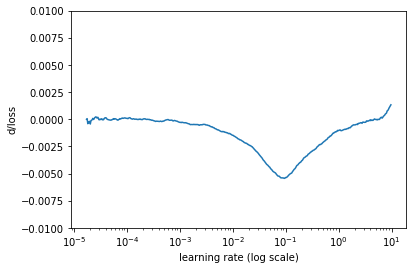

In [48]:
best_lr = plot_loss_change(learn.sched, sma=20)

In [49]:
best_lr

0.0938279042119133

**Looking at the above plot, we can see that 0.1 seems the best learning rate.**

## Traing with optimal learning rate

In [53]:
learn.fit(best_lr, n_cycle=3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.154098   0.135437   0.882523  
    1      0.143319   0.127803   0.8885    
    2      0.139928   0.126031   0.89099   
    3      0.138156   0.123588   0.891994  
    4      0.137754   0.122032   0.893351  
    5      0.135883   0.120822   0.895105  
    6      0.136197   0.120488   0.89558   



[array([0.12049]), 0.895580475164682]

In [84]:
??learn.sched.plot_loss()

Signature: learn.sched.plot_loss(n_skip=10, n_skip_end=5)
Source:   
    def plot_loss(self, n_skip=10, n_skip_end=5):
        '''
        plots loss function as function of iterations. 
        When used in Jupyternotebook, plot will be displayed in notebook. Else, plot will be displayed in console and both plot and loss are saved in save_path. 
        '''
        if not in_ipynb(): plt.switch_backend('agg')
        plt.plot(self.iterations[n_skip:-n_skip_end], self.losses[n_skip:-n_skip_end])
        if not in_ipynb():
            plt.savefig(os.path.join(self.save_path, 'loss_plot.png'))
            np.save(os.path.join(self.save_path, 'losses.npy'), self.losses[10:])
File:      ~/fastai/fastai/sgdr.py
Type:      method


In [87]:
def plot_loss(learner, n_skip=10, n_skip_end=5):
    '''
    plots training loss and validation loss as function of iterations. 
    '''
    fig, ax = plt.subplots()
    ax.plot(learn.sched.iterations,learn.sched.losses, label='Training Loss')
    ax.scatter(learn.sched.epochs, learn.sched.val_losses, c='red', label='Validation Loss')
    ax.legend()
    fig.tight_layout()

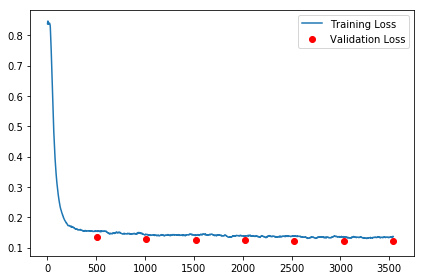

In [88]:
plot_loss(learn, 100, 10)

## Unfreeze and Train with differential learning rate

In [89]:
lrs = np.array([best_lr/9,best_lr/3,best_lr])

In [91]:
learn.unfreeze()
learn.fit(lrs, n_cycle=3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.119182   0.108339   0.908975  
    1      0.114272   0.101643   0.916492  
    2      0.108855   0.099859   0.915163  
    3      0.108338   0.099138   0.916225  
    4      0.105625   0.095999   0.920414  
    5      0.100683   0.095101   0.920859  
    6      0.100023   0.094541   0.920746  



[array([0.09454]), 0.9207464301200845]

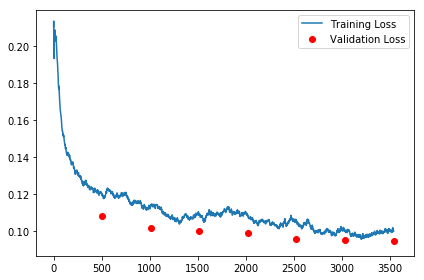

In [92]:
plot_loss(learn)

**We can see that it is underfitting**

In [93]:
learn.save(f'{sz}')

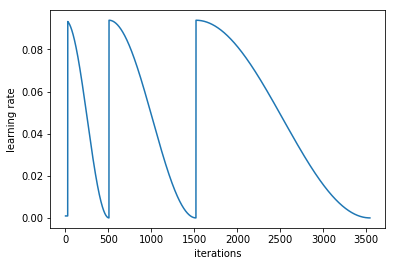

In [95]:
learn.sched.plot_lr()

In [109]:
learn.sched.init_lrs

array([0.01043, 0.03128, 0.09383])

**We can see 3 cycles. The learnining rate begins at 0.01 approximately and decreases as you ride the cycle down.  
The first cycle has about 500 iterations or 1 epoch.  
The second cycle has about 1000 iterations or 2 epochs.  
The third cycle has about 2000 iterations or 4 epochs.  
Indeed the cycle multiplying factor is 2 epochs.**

In [100]:
data.bs, data.trn_ds.n, data.trn_ds.n/data.bs 

(64, 32384, 506.0)

In [105]:
learn.sched.epochs

[506, 1012, 1518, 2024, 2530, 3036, 3542]

## Begin Training with 128 x 128

### Generate dataset

In [110]:
sz=128

In [115]:
??data.resize()

Signature: data.resize(targ_sz, new_path='tmp')
Docstring: <no docstring>
Source:   
    def resize(self, targ_sz, new_path='tmp'):
        new_ds = []
        dls = [self.trn_dl,self.val_dl,self.fix_dl,self.aug_dl]
        if self.test_dl: dls += [self.test_dl, self.test_aug_dl]
        else: dls += [None,None]
        t = tqdm_notebook(dls)
        for dl in t: new_ds.append(self.resized(dl, targ_sz, new_path))
        t.close()
        return self.__class__(new_ds[0].path, new_ds, self.bs, self.num_workers, self.classes)
File:      ~/fastai/fastai/dataset.py
Type:      method


In [112]:
data = data.resize(int(sz), 'tmp')

In [118]:
data.trn_ds.sz

64

**Resize did not work**

In [119]:
data = gen_data_loader(sz)

In [121]:
data.trn_ds.sz

128

## Freeze for Transfer Learning

In [122]:
learn.set_data(data)
learn.freeze()

In [124]:
learn.fit(best_lr, n_cycle=3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.101259   0.094764   0.91898   
    1      0.098354   0.093334   0.921047  
    2      0.099522   0.092953   0.920257  
    3      0.099206   0.092976   0.920598  
    4      0.095528   0.091598   0.921903  
    5      0.094181   0.091566   0.921898  
    6      0.095851   0.091549   0.92167   



[array([0.09155]), 0.9216703493836994]

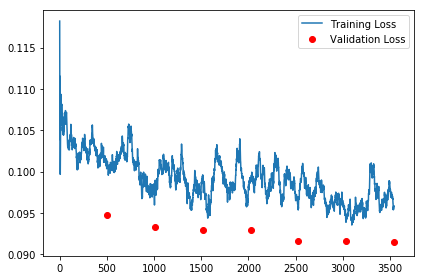

In [125]:
plot_loss(learn)

**F2 Score is not improving but model is underfitting**

## Finding the best learning rate again


In [126]:
lrf = learn.lr_find()

epoch      trn_loss   val_loss   f2         
    0      0.151488   0.206933   0.879574  



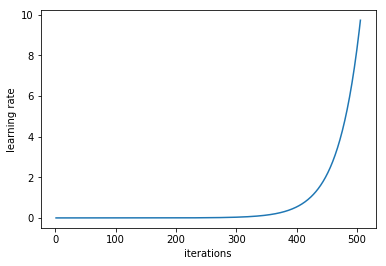

In [128]:
learn.sched.plot_lr()

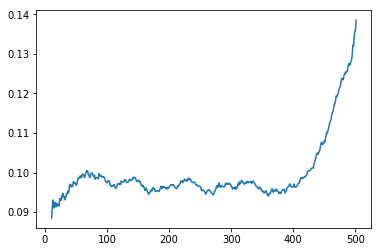

In [130]:
learn.sched.plot_loss()

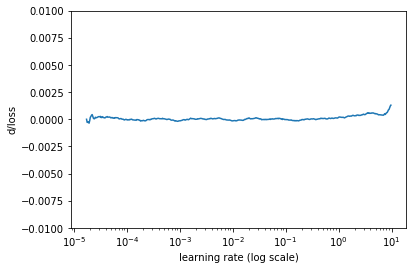

In [131]:
best_lr = plot_loss_change(learn.sched, sma=20)

In [132]:
best_lr

1.9256838149068582e-05

### Unfreeze and train with differential learning rate

In [133]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   f2         
    0      0.094252   0.088342   0.924343  
    1      0.093663   0.087577   0.92676   
    2      0.090246   0.085903   0.927183  
    3      0.09451    0.088198   0.924813  
    4      0.089933   0.085752   0.928651  
    5      0.085918   0.084961   0.928072  
    6      0.086037   0.084363   0.929761  



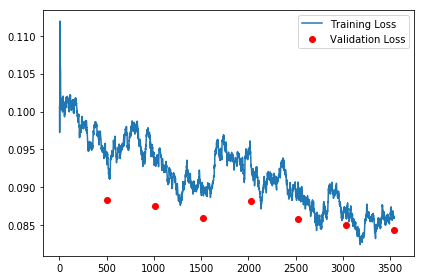

In [134]:
plot_loss(learn)

**This is the best model yet**

In [136]:
learn.models_path

'../data/planet/models'

____

# Model Performance Analysis

In [138]:
learn64 = ConvLearner.pretrained(f_model, gen_data_loader(64))
learn128 = ConvLearner.pretrained(f_model, gen_data_loader(128))

In [147]:
learn64.load(f'64')

In [148]:
learn128.load(f'128')

In [150]:
multi_preds64, y = learn64.TTA()


In [151]:
multi_preds128, y = learn128.TTA()


In [140]:
multi_preds.shape, y.shape

((5, 8095, 17), (8095, 17))

In [141]:
multi_preds[:,0,:]

array([[0.74309, 0.22174, 0.54685, 0.4928 , 0.39733, 0.78889, 0.8083 , 0.30259, 0.43901, 0.35275, 0.1423 ,
        0.64334, 0.23751, 0.46068, 0.40645, 0.44411, 0.57398],
       [0.79612, 0.25419, 0.37254, 0.54337, 0.47208, 0.70626, 0.61817, 0.15484, 0.37412, 0.41064, 0.12607,
        0.57151, 0.2821 , 0.43529, 0.70169, 0.3198 , 0.56354],
       [0.65795, 0.35432, 0.38858, 0.44979, 0.49456, 0.69356, 0.64415, 0.1815 , 0.32616, 0.36523, 0.23082,
        0.55706, 0.46798, 0.48434, 0.66295, 0.40559, 0.60728],
       [0.7133 , 0.22353, 0.54118, 0.48086, 0.40348, 0.77196, 0.79853, 0.305  , 0.44274, 0.34863, 0.14714,
        0.64245, 0.24187, 0.45996, 0.40068, 0.44145, 0.57427],
       [0.59627, 0.21602, 0.39205, 0.35589, 0.52956, 0.65464, 0.69624, 0.42722, 0.31034, 0.34764, 0.21809,
        0.61812, 0.44673, 0.46043, 0.57219, 0.48101, 0.68325]], dtype=float32)

In [142]:
y[0,:]

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.], dtype=float32)

In [154]:
preds64 = np.mean(multi_preds64, 0)
preds128 = np.mean(multi_preds128, 0)


**Sample Predictions**

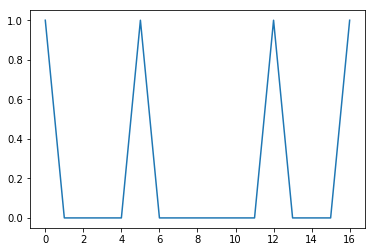

In [155]:
plt.plot(y[0,:])

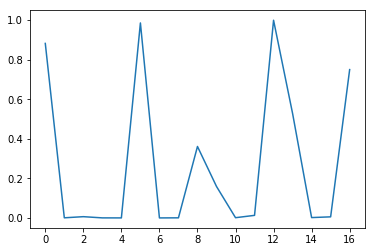

In [156]:
plt.plot(preds64[0,:])

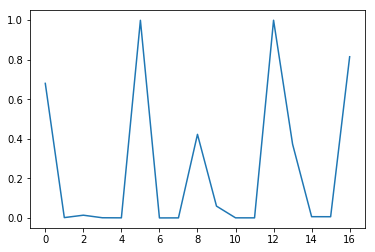

In [157]:
plt.plot(preds128[0,:])

In [158]:
f2(preds64,y)

0.9204492893722565

In [159]:
f2(preds128,y)

0.9290529511877146

### End